In [235]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings

warnings.filterwarnings("ignore")

In [236]:
df = pd.read_csv("StudentsPerformance.csv")

In [237]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [239]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [240]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [241]:
df.duplicated().sum()

np.int64(0)

In [242]:
df.shape

(1000, 8)

In [243]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [244]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [245]:
df.rename(columns={"race/ethnicity":"race_ethnicity"},inplace=True)

----

## **✅ Data Quality Check Summary**

- **Before diving into Exploratory Data Analysis (EDA), a thorough data quality assessment was performed. Below are the key observations:**

- **No missing/null values found in any columns.**
- **No duplicate rows present in the dataset.**
- **All columns have appropriate data types.**
- **Dataset shape and structure confirmed: `(rows: ..., columns: ...)`**
- **All categorical columns have clean and consistent values (checked via `.nunique()` and `.unique()`).**

- **Since the dataset is already clean and well-structured, we can confidently proceed directly to the EDA section.**


---

## **EDA**

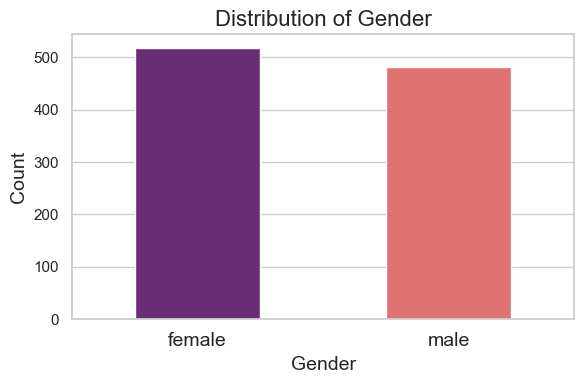

In [246]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="gender", palette="magma",width=0.5)
sns.set_style("whitegrid")
plt.title("Distribution of Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize = 14)
plt.tight_layout()
plt.show()

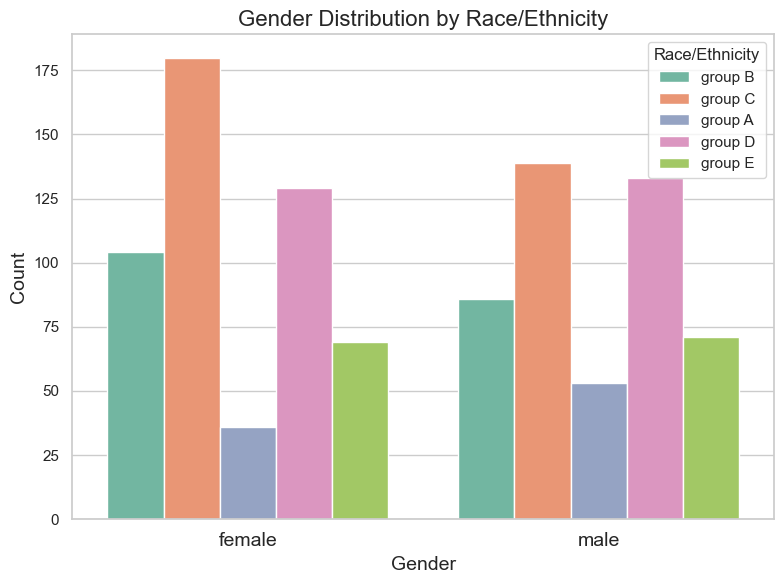

In [247]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="gender", hue="race_ethnicity", palette="Set2")
plt.title("Gender Distribution by Race/Ethnicity", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Race/Ethnicity")
plt.xticks(fontsize = 14)
plt.tight_layout()
plt.show()

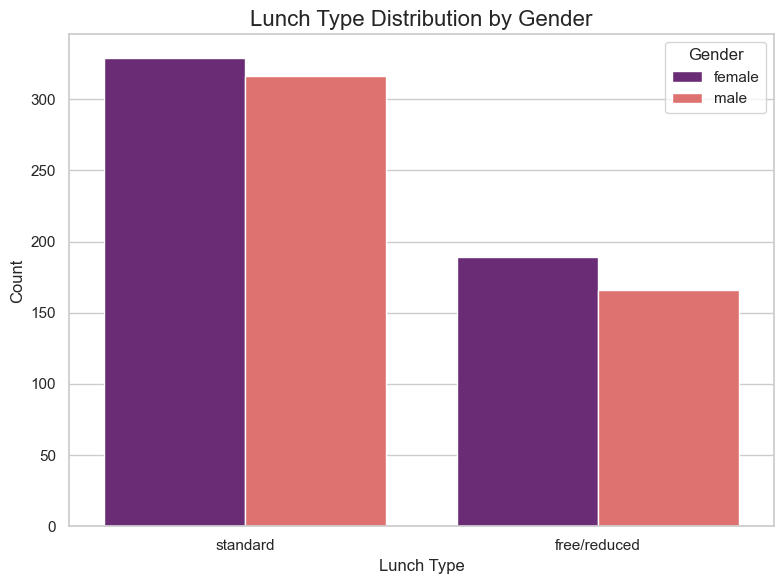

In [248]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="lunch", hue="gender", palette="magma")
plt.title("Lunch Type Distribution by Gender", fontsize=16)
plt.xlabel("Lunch Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

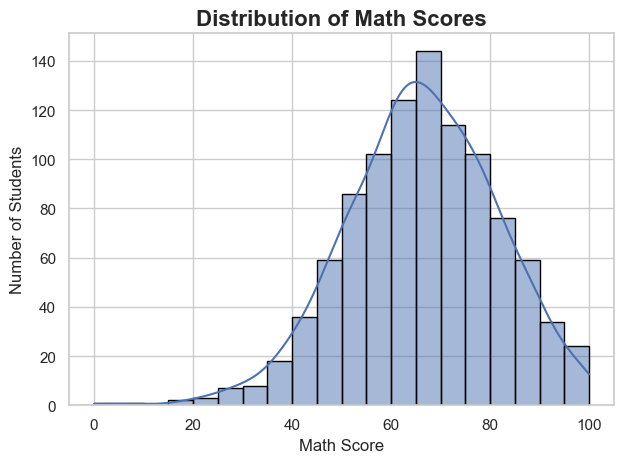

In [249]:
sns.set(style="whitegrid")
sns.histplot(data=df, x="math score", bins=20, kde=True, edgecolor="black")
plt.title("Distribution of Math Scores", fontsize=16, fontweight='bold')
plt.xlabel("Math Score", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.tight_layout()
plt.show()

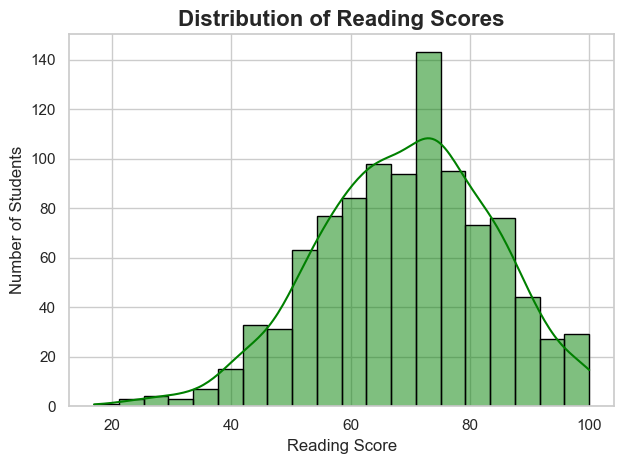

In [250]:
sns.histplot(data=df, x="reading score", bins=20, kde=True, color="green", edgecolor="black")
plt.title("Distribution of Reading Scores", fontsize=16, fontweight='bold')
plt.xlabel("Reading Score", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.tight_layout()
plt.show()


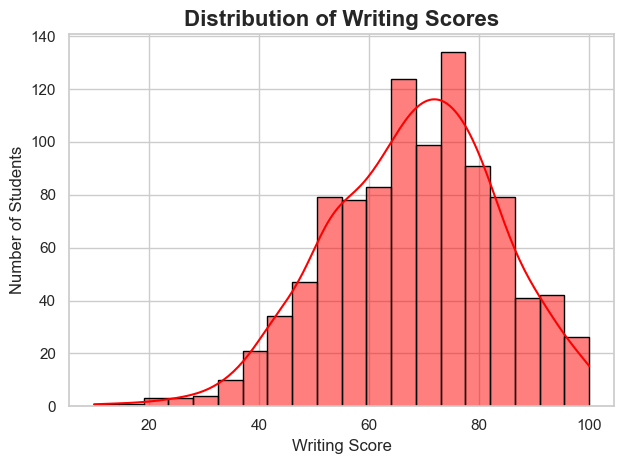

In [251]:
sns.histplot(data=df, x="writing score", bins=20, kde=True, color="red", edgecolor="black")
plt.title("Distribution of Writing Scores", fontsize=16, fontweight='bold')
plt.xlabel("Writing Score", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.tight_layout()
plt.show()


In [252]:
print("Math Score Skew:", df["math score"].skew())
print("Reading Score Skew:", df["reading score"].skew())
print("Writing Score Skew:", df["writing score"].skew())


Math Score Skew: -0.27893514909431694
Reading Score Skew: -0.25910451810923063
Writing Score Skew: -0.28944397150761897


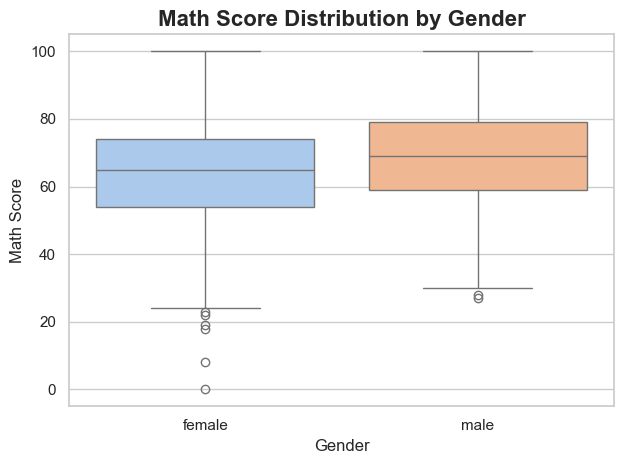

In [253]:
sns.boxplot(data=df, x="gender", y="math score", palette="pastel")
plt.title("Math Score Distribution by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Math Score", fontsize=12)
plt.tight_layout()
plt.show()


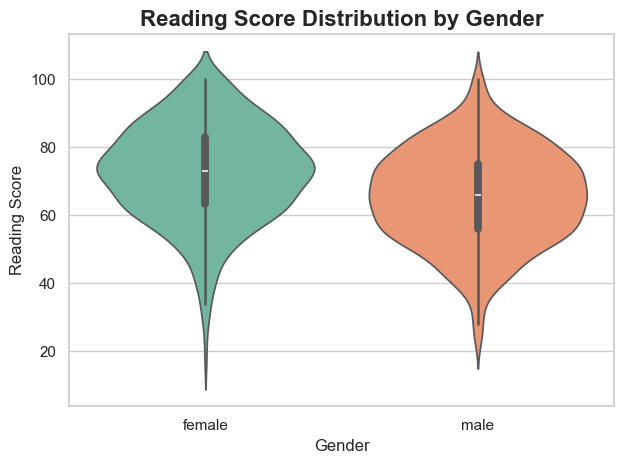

In [254]:
sns.violinplot(data=df, x="gender", y="reading score", palette="Set2")
plt.title("Reading Score Distribution by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Reading Score", fontsize=12)
plt.tight_layout()
plt.show()


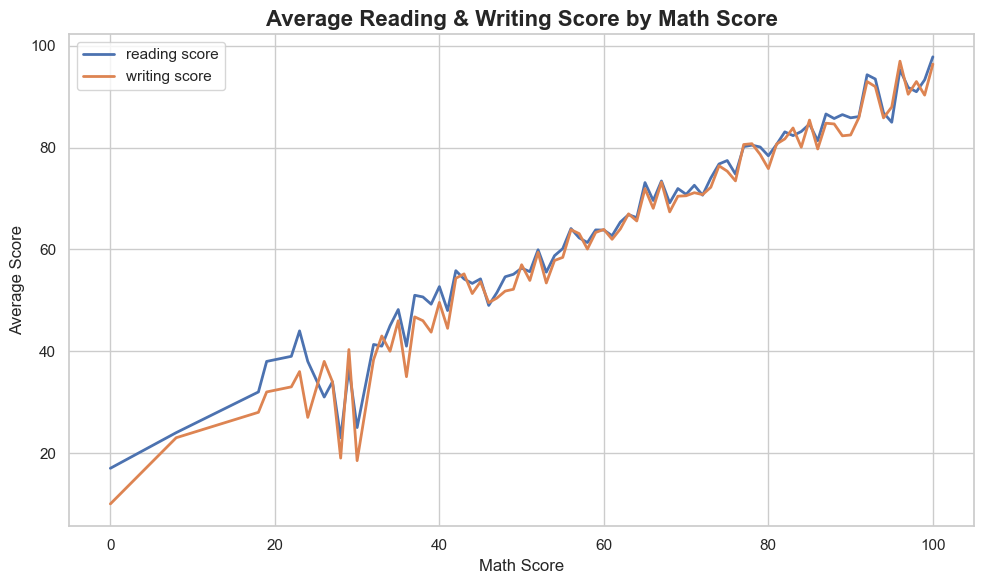

In [255]:
select_cols = df.select_dtypes(include='number').columns
grouped_df = df.groupby("math score")[select_cols].mean()
sns.set_style("whitegrid")
grouped_df[["reading score", "writing score",]].plot(figsize=(10,6), linewidth=2)
plt.title("Average Reading & Writing Score by Math Score", fontsize=16, fontweight="bold")
plt.xlabel("Math Score")
plt.ylabel("Average Score")
plt.grid(True)
plt.tight_layout()
plt.show()


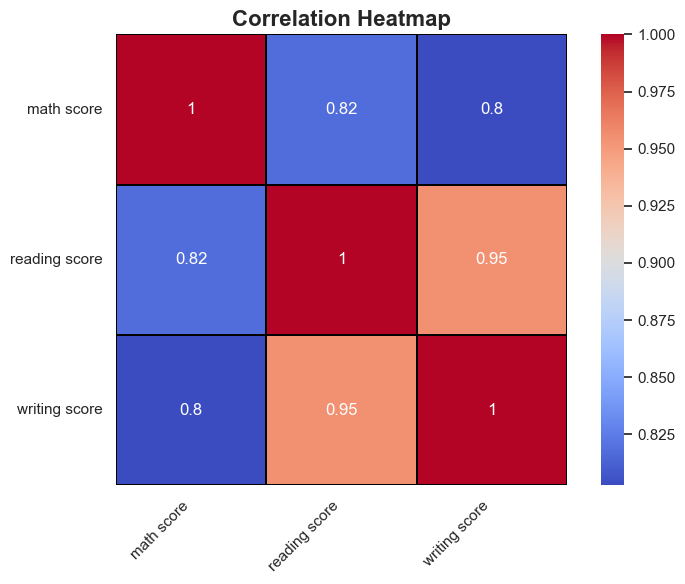

In [256]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.2, linecolor='black', cbar=True, square=True)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **📝 EDA Summary**

- **The dataset appears clean with no missing values or duplicates, and correct data types.**
- **Gender distribution is balanced, with a slight difference in race/ethnicity and lunch types between genders.**
- **Math, reading, and writing scores are all roughly normally distributed with slight left skewness — no major transformation needed.**
- **Boxplots revealed a few low-scoring outliers, more visible in female math scores.**
- **Correlation analysis showed strong positive relationships between all three scores:**
  - **Math vs Reading: High correlation**
  - **Math vs Writing: Strong correlation**
  - **Reading vs Writing: Very strong correlation**
- **Overall, the dataset is well-structured and ready for feature engineering and modeling.**


---